# Linear Model - RBF Model - Polynomial Model
Modificar las variables para evaluar otra acción o la fecha.

In [ ]:
# --------------------------------
# ----- Variables del modelo -----
# --------------------------------
ACCION = 'AAPL'
FECHA_INICIO = '2019-01-01'
FECHA_FINAL  = '2019-01-30'

In [ ]:
# Importaciones

import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas_datareader.data import DataReader
%matplotlib inline

In [ ]:
# Cargamos el dataset

dataframe = DataReader(
    ACCION, 
    data_source='yahoo', 
    start=FECHA_INICIO, 
    end=FECHA_FINAL
)

dataframe["Date"] = dataframe.index
dataframe.head()

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800,38.326294,2019-01-02
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800,34.508709,2019-01-03
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400,35.981869,2019-01-04
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200,35.901772,2019-01-07
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200,36.586170,2019-01-08


In [ ]:
# Formateamos los datos

df = pd.DataFrame({
    "open": dataframe['Open'],
    "volume": dataframe['Volume'],
    "high": dataframe['High'],
    "low": dataframe['Low'],
    "close": dataframe['Close'],
    "date": dataframe['Date'].astype(str),
    "adjclose": dataframe['Adj Close'],
})
df.head()

,open,volume,high,low,close,date,adjclose
Date,,,,,,,
2019-01-02,38.722500,148158800,39.712502,38.557499,39.480000,2019-01-02,38.326294
2019-01-03,35.994999,365248800,36.430000,35.500000,35.547501,2019-01-03,34.508709
2019-01-04,36.132500,234428400,37.137501,35.950001,37.064999,2019-01-04,35.981869
2019-01-07,37.174999,219111200,37.207500,36.474998,36.982498,2019-01-07,35.901772
2019-01-08,37.389999,164101200,37.955002,37.130001,37.687500,2019-01-08,36.586170


In [ ]:
def get_data(df):  
    data = df.copy()
    data['date'] = data['date'].str.split('-').str[2]
    data['date'] = pd.to_numeric(data['date'])
    return [ data['date'].tolist(), data['close'].tolist() ] # Convertimos la serie a una lista

In [ ]:
dates, prices = get_data(df)
print(dates, prices)

[2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 23, 24, 25, 28, 29, 30] [39.47999954223633, 35.54750061035156, 37.064998626708984, 36.98249816894531, 37.6875, 38.32749938964844, 38.45000076293945, 38.0724983215332, 37.5, 38.26750183105469, 38.73500061035156, 38.96500015258789, 39.20500183105469, 38.32500076293945, 38.47999954223633, 38.17499923706055, 39.439998626708984, 39.07500076293945, 38.66999816894531, 41.3125]


In [ ]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # Convertimos a 1 dimensión
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Llenamos con los datos los modelos de regresión
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

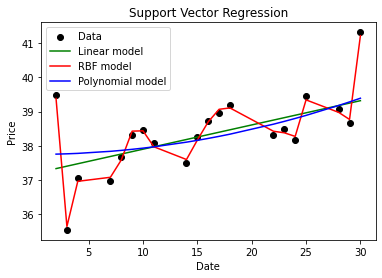

In [ ]:
predicted_price = predict_prices(dates, prices, [31])


In [ ]:
predicted_price

(44.488942389582675, 39.387207076152066, 39.49888318426933)

In [ ]:
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e251de5-0dc4-4401-98b7-759471e83f8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>